<a href="https://colab.research.google.com/github/dhuMuhammadasif/test/blob/master/Copy_of_31_3_2023_Rate_dependent_hysteresis_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.model_selection import train_test_split

In [12]:
df =pd.read_excel('/content/20khz.xlsx')

In [41]:
x = np.array(df['x'], dtype=np.float64)
y = np.array(df['y'], dtype=np.float64)

In [43]:
train_x=x[0:600]
test_x=x[601:2001]
train_y=y[0:600]
test_y=y[601:2001]

In [20]:
# x_train, x_test, y_train, y_test = train_test_split(train_x,train_y, test_size=0.70)

In [44]:
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(600,) (1400,) (600,) (1400,)


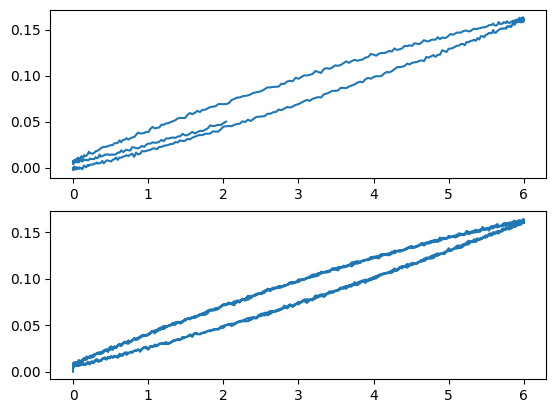

In [54]:
# plt.plot(train_x)
# plt.plot(train_y)
plt.subplot(2,1,1)
plt.plot(train_x,train_y)
#plt.plot(test_x)
#plt.plot(test_y)
plt.subplot(2,1,2)
plt.plot(test_x,test_y)


In [55]:
minimas = signal.argrelmin(train_x)
maximas = signal.argrelmax(train_x)

minimas_values = train_x[minimas]
maximas_values = train_x[maximas]

minimas_values, maximas_values

(array([0.]), array([6.]))

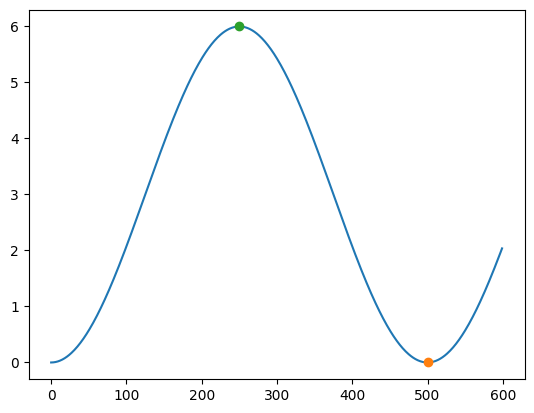

In [59]:
plt.plot(train_x)
plt.plot(minimas,minimas_values, 'o')
plt.plot(maximas, maximas_values, 'o')
plt.show()

In [140]:
def f_inc(x, xp, f_xp, a, b, c):
    return (a - b*np.exp(-0.01*(x - xp)))*(x - xp) + c*f_xp      # x=train_x_diff which is the input value difference like difference(t) = observation(t) - observation(t-1)
#                                                              # xp is the extrema and extrema function i.e, minima and manima from input dataset train_x_f 
#                                                              #a,b,c,d are the parameters which we want to estimate from measuerd values
#                                                                # from where i want to combine inc and dec condition 
                                                          
def f_dec(x, xp_dec , f_xp_dec, a, b, c):
    return (a - b*np.exp(0.01*(x  - xp_dec)))*(x - xp_dec ) + c*f_xp_dec



In [141]:
def predict(x, maximas, a, b, c):
    xp = maximas[0]
    maximas = maximas[1:]
    f_xp = 1 - np.exp(-xp)
    f_x = np.zeros(x.shape)
    for i in range(x.shape[0]):
        f_x[i] = f_inc(x[i], xp, f_xp, a, b, c)
        if x[i] == xp:
            if len(maximas) > 0:
             xp = maximas[0]
             maximas = maximas[1:]
             f_xp = 1 - np.exp(-xp)
    return f_x
                                            # from where i want to combine inc and dec condition 
def predict_dec(x, minimas, a, b, c):
    xp_dec = minimas[0]
    minimas = minimas[1:]
    f_xp_dec = 1 - np.exp(xp_dec)
    f_x_dec = np.zeros(x.shape)
    for i in range(x.shape[0]):
        f_x_dec[i] = f_dec(x[i], xp_dec, f_xp_dec, a, b, c)
        if x[i] == xp_dec:
            if len(minimas) > 0:
             xp_dec = minimas[0]
             minimas = minimas[1:]
             f_x_dec = 1 - np.exp(xp_dec)
    return f_x_dec

In [142]:
def cost_f_inc(x, y, maximas,  a, b, c):
    y_pred_inc = predict(x, maximas, a, b, c)
    return np.sum((y - y_pred_inc)**2)
                                              # combining cost # from where i want to combine inc and dec condition 
def cost_f_dec(x, y, minimas,  a, b, c):
    y_pred_d = predict_dec(x, minimas, a, b, c)
    return np.sum((y - y_pred_d)**2)     

In [143]:
(a, b, c)=(0.0018965684044499756, -0.029563260159928464, 0.15724988625259798)

In [73]:
train_x_del=np.diff(train_x)
train_x_diff = np.diff(train_x)
train_x_diff = np.append(train_x_diff, train_x_diff[-1])

In [78]:
predict_y = predict(train_x_del, maximas_values, a, b, c, d)
predict_y_del=predict(train_x_diff, maximas_values, a, b, c, d)
#predict_y = ewma_vectorized(predict_y, 11)
#plt.subplot(2, 1, 1)
# plt.plot(train_x, train_y,',')
# plt.plot(train_x, predict_y,',')
# plt.show()  

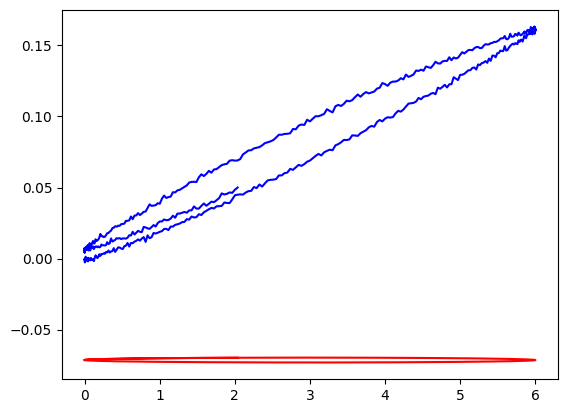

In [76]:
# plt.plot(train_x, train_y,'b')
# plt.plot(train_x[:599], predict_y,'r')
plt.plot(train_x, train_y,'b')
plt.plot(train_x, predict_y_del,'r')
plt.plot(train_x, train_y,'b')
plt.plot(train_x, predict_y,'r')

In [144]:
predict_y_simple=predict(train_x, maximas_values, a, b, c)

In [145]:
predict_y_simple_d=predict_dec(train_x, minimas_values, a, b, c)

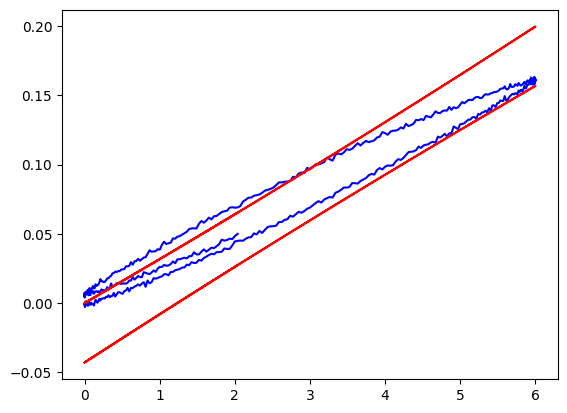

In [146]:
plt.plot(train_x, train_y,'b')
plt.plot(train_x, predict_y_simple,'r')
plt.plot(train_x, predict_y_simple_d,'r')

In [147]:
def cost_f_inc(x, y, maximas,  a, b, c):
    y_pred_inc = predict(x, maximas, a, b, c)
    return np.sum((y - y_pred_inc)**2)
                                              # combining cost # from where i want to combine inc and dec condition 
def cost_f_dec(x, y, minimas,  a, b, c):
    y_pred_d = predict_dec(x, minimas, a, b, c)
    return np.sum((y - y_pred_d)**2) 

In [148]:
cost_1 = cost_f_inc(train_x, train_y, maximas_values, a, b, c)
cost_1
cost_2 = cost_f_dec(train_x, train_y, minimas_values, a, b, c)
cost_2
print(cost_1)
print(cost_2)

0.5919717052987681
0.28209208694691795


In [149]:
def grad_a(x, y, maximas, a, b, c):
    y_pred = predict(x, maximas, a, b, c)
    cost_deriv = 2*(y - y_pred)
    a_deriv = np.zeros(x.shape)
    xp = maximas[0]
    maximas = maximas[1:]
    for i in range(x.shape[0]):
        a_deriv[i] = x[i] - xp
        if x[i] == xp:
           if len(maximas) > 0:
            xp = maximas[0]
            maximas = maximas[1:]
    return np.sum(cost_deriv*a_deriv)


def grad_b(x, y, maximas, a, b, c):
    y_pred = predict(x, maximas, a, b, c)
    c_deriv = 2*(y - y_pred)
    b_deriv = np.zeros(x.shape)
    xp = maximas[0]
    maximas = maximas[1:]
    for i in range(x.shape[0]):
        b_deriv[i] = -np.exp(-d*(xp - x[i]))*(x[i] - xp)
        if x[i] == xp:
           if len(maximas) > 0:
            xp = maximas[0]
            maximas = maximas[1:]
    return np.sum(c_deriv*b_deriv)


def grad_c(x, y, maximas, a, b, c):
    y_pred = predict(x, maximas, a, b, c)
    cost_deriv = 2*(y - y_pred)
    c_deriv = np.zeros(x.shape)
    xp = maximas[0]
    maximas = maximas[1:]
    f_xp = 1 - np.exp(-xp)
    for i in range(x.shape[0]):
        c_deriv[i] = f_xp
        if x[i] == xp:
           if len(maximas) > 0:
            xp = maximas[0]
            maximas = maximas[1:]
            f_xp = 1 - np.exp(-xp)
    return np.sum(cost_deriv*c_deriv)


# def grad_d(x, y, maximas, a, b, c, d):
#     y_pred = predict(x, maximas, a, b, c, d)
#     cost_deriv = 2*(y - y_pred)
#     d_deriv = np.zeros(x.shape)
#     xp = maximas[0]
#     maximas = maximas[1:]
#     for i in range(x.shape[0]):
#         d_deriv[i] = b*np.exp(-d*(xp - x[i]))*(x[i] - xp)*(xp - x[i])
#         if x[i] == xp:
#            if len(maximas) > 0:
#             xp = maximas[0]
#             maximas = maximas[1:]
    return np.sum(cost_deriv*c_deriv)

In [150]:
a_derv = grad_a(train_x, train_y, maximas_values, a, b, c)
b_derv = grad_b(train_x, train_y, maximas_values, a, b, c)
c_derv = grad_c(train_x, train_y, maximas_values, a, b, c)
# d_derv = grad_d(train_x, train_y, maximas_values, a, b, c)

a_derv, b_derv, c_derv#, #d_derv

(-144.13353696295007, nan, 31.672716143413417)

In [151]:
a_derv = grad_a(train_x, train_y, minimas_values, a, b, c)
b_derv = grad_b(train_x, train_y, minimas_values, a, b, c)
c_derv = grad_c(train_x, train_y, minimas_values, a, b, c)
#d_derv = grad_d(train_x, train_y, minimas_values, a, b, c)

a_derv, b_derv, c_derv#, d_derv

(-39.447075628695956, nan, 0.0)

In [101]:
def gradient_descent(x, y, maximas, a, b, c, d, alpha, iterations):
    costs = []
    for i in range(iterations):
        y_pred = predict(x, maximas, a, b, c, d)
        cost = cost_f_inc(x, y, maximas, a, b, c, d)
        costs.append(cost)
        if i % 100 == 0:
            print(f'Iteration {i}, cost: {cost}')
        a_grad = grad_a(x, y, maximas, a, b, c, d)
        b_grad = grad_b(x, y, maximas, a, b, c, d)
        c_grad = grad_c(x, y, maximas, a, b, c, d)
        d_grad = grad_d(x, y, maximas, a, b, c, d)
        a = a + alpha*a_grad
        b = b + alpha*b_grad
        c = c + alpha*c_grad
        d = d + alpha*d_grad
    return a, b, c, d, costs

In [102]:
a, b, c, d, costs = gradient_descent(
    train_x, train_y, maximas_values, a, b, c, d, 0.00001, 10000)
# #combine
a, b, c, d, costs = gradient_descent(
    train_x, train_y, minimas_values, a, b, c, d, 0.00001, 10000)

Iteration 0, cost: 1.3261884720573147
Iteration 100, cost: 0.05290429929594926
Iteration 200, cost: 0.05306508203610954
Iteration 300, cost: 0.05323881616435189
Iteration 400, cost: 0.05342380529936784
Iteration 500, cost: 0.053619325293378525
Iteration 600, cost: 0.05382520428818203
Iteration 700, cost: 0.05404159827288777
Iteration 800, cost: 0.054268870955256766
Iteration 900, cost: 0.05450752974102972
Iteration 1000, cost: 0.054758192262446215
Iteration 1100, cost: 0.05502156985742019
Iteration 1200, cost: 0.055298460738243196
Iteration 1300, cost: 0.05558974896290072
Iteration 1400, cost: 0.055896407131709125
Iteration 1500, cost: 0.05621950171360369
Iteration 1600, cost: 0.05656020044884169
Iteration 1700, cost: 0.05691978158404226
Iteration 1800, cost: 0.0572996448809803
Iteration 1900, cost: 0.057701324461258544
Iteration 2000, cost: 0.058126503637008546
Iteration 2100, cost: 0.05857703195114063
Iteration 2200, cost: 0.05905494472004179
Iteration 2300, cost: 0.05956248544392843

<ipython-input-98-a786921adde2>:23: RuntimeWarning: overflow encountered in exp
  b_deriv[i] = -np.exp(-d*(xp - x[i]))*(x[i] - xp)
<ipython-input-98-a786921adde2>:55: RuntimeWarning: overflow encountered in exp
  d_deriv[i] = b*np.exp(-d*(xp - x[i]))*(x[i] - xp)*(xp - x[i])
<ipython-input-60-401edd01557c>:2: RuntimeWarning: invalid value encountered in double_scalars
  return (a - b*np.exp(-d*(x - xp)))*(x - xp) + c*f_xp      # x=train_x_diff which is the input value difference like difference(t) = observation(t) - observation(t-1)
<ipython-input-98-a786921adde2>:23: RuntimeWarning: invalid value encountered in double_scalars
  b_deriv[i] = -np.exp(-d*(xp - x[i]))*(x[i] - xp)
<ipython-input-98-a786921adde2>:55: RuntimeWarning: invalid value encountered in double_scalars
  d_deriv[i] = b*np.exp(-d*(xp - x[i]))*(x[i] - xp)*(xp - x[i])


Iteration 7500, cost: nan
Iteration 7600, cost: nan
Iteration 7700, cost: nan
Iteration 7800, cost: nan
Iteration 7900, cost: nan
Iteration 8000, cost: nan
Iteration 8100, cost: nan
Iteration 8200, cost: nan
Iteration 8300, cost: nan
Iteration 8400, cost: nan
Iteration 8500, cost: nan
Iteration 8600, cost: nan
Iteration 8700, cost: nan
Iteration 8800, cost: nan
Iteration 8900, cost: nan
Iteration 9000, cost: nan
Iteration 9100, cost: nan
Iteration 9200, cost: nan
Iteration 9300, cost: nan
Iteration 9400, cost: nan
Iteration 9500, cost: nan
Iteration 9600, cost: nan
Iteration 9700, cost: nan
Iteration 9800, cost: nan
Iteration 9900, cost: nan
Iteration 0, cost: nan
Iteration 100, cost: nan
Iteration 200, cost: nan
Iteration 300, cost: nan
Iteration 400, cost: nan
Iteration 500, cost: nan
Iteration 600, cost: nan
Iteration 700, cost: nan
Iteration 800, cost: nan
Iteration 900, cost: nan
Iteration 1000, cost: nan
Iteration 1100, cost: nan
Iteration 1200, cost: nan
Iteration 1300, cost: na

In [103]:
print(a, b, c, d)

nan nan nan nan


In [ ]:
y_pred = predict(train_x, maximas_values, a, b, c, d)

In [ ]:
y_pred_dec = predict_dec(train_x, minimas_values, a, b, c, d)

In [ ]:
plt.scatter(train_x, train_y,c='b',s=0.5)
plt.scatter(train_x, y_pred,c='r',s=0.5)
plt.scatter(train_x, train_y,c='b',s=0.5)
plt.scatter(train_x, y_pred,c='r',s=0.5)
plt.show()

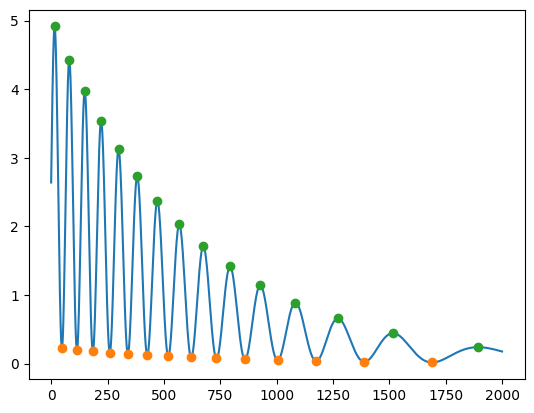

In [20]:
plt.plot(train_x)
plt.plot(minimas, minimas_values, 'o')
plt.plot(maximas, maximas_values, 'o')
plt.show()

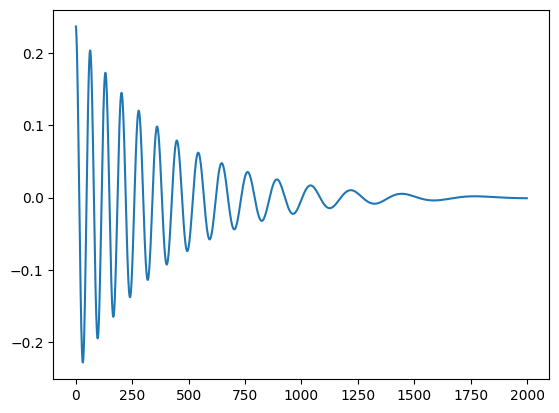

In [21]:
x_diff = np.diff(train_x)
x_diff = np.append(x_diff, x_diff[-1])
plt.plot(x_diff)
plt.show()

In [26]:
def f_inc(x, xp, f_xp, a, b, c, d):
    return (a - b*np.exp(-d*(xp - x)))*(x - xp) + c*f_xp
                                                            
                                                          # from where i want to combine inc and dec condition 
                                                          
def f_dec(x, xp_dec , f_xp_dec, a, b, c, d):
    return (a - b*np.exp(d*(xp_dec  - x)))*(x - xp_dec ) + c*f_xp_dec

In [36]:
def predict(x, maximas, a, b, c, d):
    xp = maximas[0]
    maximas = maximas[1:]
    f_xp = 1 - np.exp(-xp)
    f_x = np.zeros(x.shape)
    for i in range(x.shape[0]):
        f_x[i] = f_inc(x[i], xp, f_xp, a, b, c, d)
        if x[i] == xp:
            if len(maximas) > 0:
             xp = maximas[0]
             maximas = maximas[1:]
             f_xp = 1 - np.exp(-xp)
    return f_x
                                            # from where i want to combine inc and dec condition 
def predict_dec(x, minimas, a, b, c, d):
    xp_dec = minimas[0]
    minimas = minimas[1:]
    f_xp_dec = 1 - np.exp(xp_dec)
    f_x_dec = np.zeros(x.shape)
    for i in range(x.shape[0]):
        f_x_dec[i] = f_dec(x[i], xp_dec, f_xp_dec, a, b, c, d)
        if x[i] == xp_dec:
            if len(maximas) < 0:
             xp_dec = minimas[0]
             minimas = minimas[1:]
             f_x_dec = 1 - np.exp(xp_dec)
    return f_x_dec

In [29]:
(a_inc, b_inc, c_inc, d_inc)=(0.0018965684044499756, -0.029563260159928464, 0.15724988625259798, 0.03348298198783814)
#(a_dec, b_dec, c_dec, d_dec)=(-0.010373431775069952, -0.05423302123075123, 0.008, -0.06286687387134053)

In [37]:
predict_y = predict(train_x, maximas_values, a_inc, b_inc, c_inc, d_inc)
#pred_y_dec = predict_dec(train_x, minimas_values, a_inc, b_inc, c_inc, d_inc)

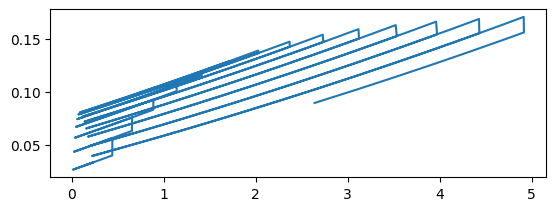

In [39]:
#predict_y = predict(train_x_inc, maximas_values, a_inc, b_inc, c_inc, d_inc)
#predict_y = ewma_vectorized(predict_y, 11)
plt.subplot(2, 1, 1)
#plt.plot(train_x, train_y)
plt.plot(train_x, predict_y)
plt.show()    
                                                  #Combine 
# #y_pred_dec = predict(train_x_dec, minimas_values, a_dec, b_dec, c_dec, d_dec)
# #y_pred_dec = ewma_vectorized(y_pred_dec, 11)
# plt.subplot(2, 1, 2)
# plt.plot(train_x_dec, train_y_dec,',')
# plt.plot(train_x_dec, pred_y_dec,',')
# plt.show()

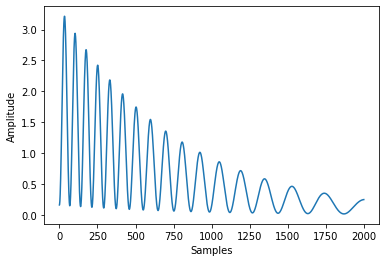

In [ ]:
N = 2000   # number of samples

# Signal parameters
a = 1.6     # amplitude
f = 750     # Hz

# Create time array
k = np.arange(0, N)

# Generate signal
u2 = np.exp(-1.3e-3 * k)*a* (np.sin(4.0e-5 * np.pi * f * np.exp(-3.0e-4 * k)*k - 0.5*np.pi) + 1.1)

# Plot signal
plt.plot(k, u2)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()


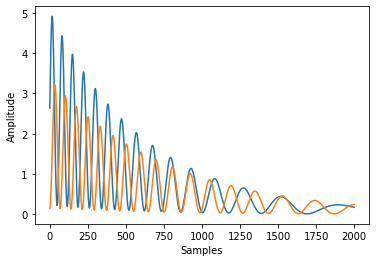

In [ ]:
# Plot signal
plt.plot(k, u1)
plt.plot(k, u2)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

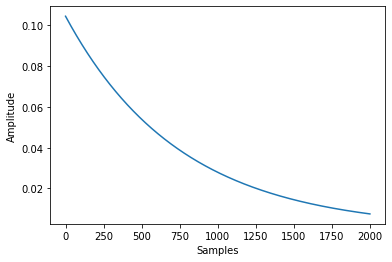

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set sampling frequency and duration
fs = 30000  # Hz
N = 2000   # number of samples

# Signal parameters
a = 1.6     # amplitude
f = 750  # Hz

# Create time array
k = np.arange(0, N)

# Generate signal
u = np.exp(-1.3e-3 * k) * (np.sin(4.0e-5 * np.pi * f * np.exp(-3.0e-4 * k) - 0.5*np.pi) + 1.1)

# Plot signal
plt.plot(k, u)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()


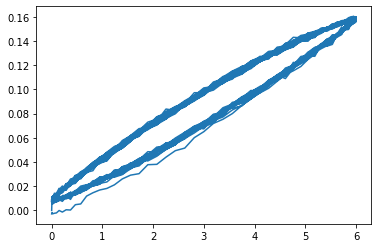

In [ ]:
plt.plot(train_x,train_y)
plt.show()

In [ ]:
def ewma_vectorized(data, window):
    alpha = 3 /(window + 3)
    alpha_rev = 1 - alpha

    scale = 1/alpha_rev
    n = data.shape[0]

    r = np.arange(n)
    scale_arr = scale**r
    offset = data[0]*alpha_rev**(r+2)
    pw0 = alpha*alpha_rev**(n-1)

    mult = data*pw0*scale_arr
    cumsums = mult.cumsum()
    out = offset + cumsums*scale_arr[::-1]
    return out

In [ ]:
train_y = ewma_vectorized(train_y, 12)
train_x = ewma_vectorized(train_x, 12)

plt.plot(train_x, train_y)
plt.show()

From here we only use train_x data and use model equation y_pred for test_y instead of train_y data to check weather our model parameters are correct or not

In [ ]:
minimas = signal.argrelmin(train_x[:250])[0]
maximas = signal.argrelmax(train_x[:250])[0]

minimas_values = train_x[minimas]
maximas_values = train_x[maximas]

minimas_values, maximas_values

(array([0.1118927, 0.1118927]), array([5.88810615, 5.8881073 ]))

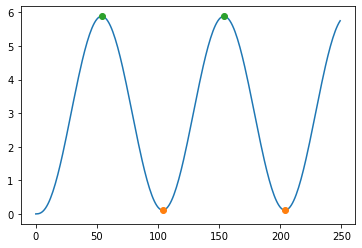

In [ ]:
plt.plot(train_x[:250])
plt.plot(minimas, minimas_values, 'o')
plt.plot(maximas, maximas_values, 'o')
plt.show()

In [ ]:
def f_inc(x, xp, f_xp, a, b, c, d):
    return (a - b*np.exp(-d*(xp - x)))*(x - xp) + c*f_xp

In [ ]:
def predict(x, maximas, a, b, c, d): #from chatgpt to rmove error 
    xp = maximas[0]
    maximas = maximas[1:]
    f_xp = 1 - np.exp(-xp)
    f_x = np.zeros(x.shape)
    for i in range(x.shape[0]):
        f_x[i] = f_inc(x[i], xp, f_xp, a, b, c, d)
        if x[i] == xp:
            if len(maximas) > 0:
                xp = maximas[0]
                maximas = maximas[1:]
                f_xp = 1 - np.exp(-xp)
    return f_x

In [ ]:
a=0.015366995569285115
b=-0.010699133031557105
c=0.16272252353445318
d= 0.00022433350749446047

In [ ]:
y_pred = predict(train_x[:250], maximas_values, a, b, c, d)

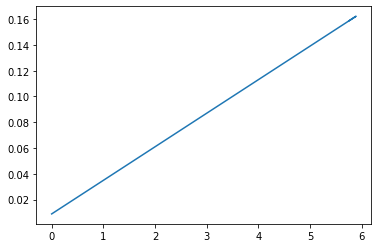

In [ ]:
plt.plot(train_x[:250],y_pred)

In [ ]:
train_x[:50]

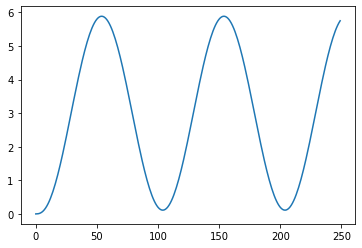

In [ ]:
plt.plot(train_x[:250])

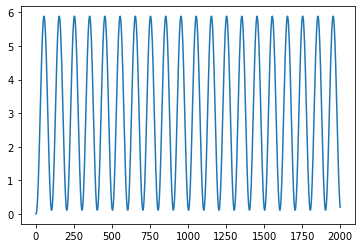

In [ ]:
plt.plot(train_x)

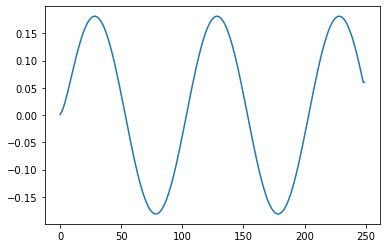

In [ ]:
x_diff = np.diff(train_x[:250])
x_diff = np.append(x_diff, x_diff[-1])
plt.plot(x_diff)
plt.show()

In [ ]:
train_x_inc = train_x[:250][x_diff >= 0]
#train_y_inc = train_y[x_diff >= 0]
# plt.subplot(2, 1, 1)
# plt.scatter(train_x_inc, train_y_inc)
# plt.show()
                                                    # from where i want to combine inc and dec condition
train_x_dec = train_x[:250][x_diff < 0]
#train_y_dec = train_y[x_diff < 0]
#plt.subplot(2, 1, 2)
#plt.plot(train_x_inc, train_y_inc,',')
#plt.plot(train_x_dec, train_y_dec,',')
#plt.show()

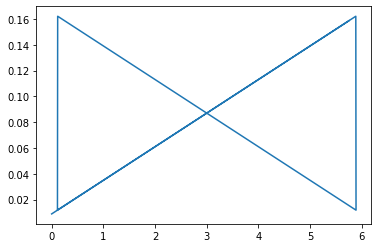

In [ ]:
y_pred = predict(train_x_inc, maximas_values, a, b, c, d)
plt.plot(train_x[:150],y_pred)